In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

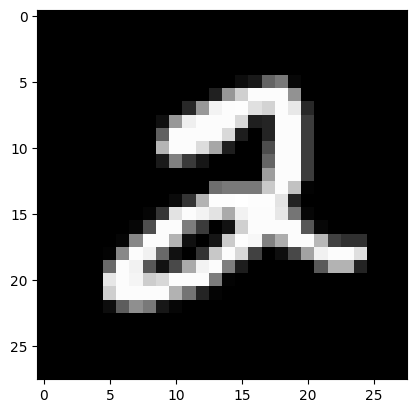

In [3]:
plt.imshow(x_train[5], cmap='gray')  # imshow() function which simply displays an image.
plt.show()

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255  # Each image has Intensity from 0 to 255
x_test /= 255

In [7]:
num_classes = 10
y_train = np.eye(num_classes)[y_train]  # Return a 2-D array with ones on the diagonal and zeros elsewhere.
y_test = np.eye(num_classes)[y_test]

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.2)) # DROP OUT RATIO 20%
model.add(Dense(512, activation='relu')) #returns a sequence of vectors of dimension 512  
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [10]:
batch_size = 128 # batch_size argument is passed to the layer to define a batch size for the inputs.
epochs = 20
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.2540 - accuracy: 0.9223 - val_loss: 0.1205 - val_accuracy: 0.9616
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1054 - accuracy: 0.9677 - val_loss: 0.0793 - val_accuracy: 0.9755
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0759 - accuracy: 0.9762 - val_loss: 0.0715 - val_accuracy: 0.9784
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0585 - accuracy: 0.9814 - val_loss: 0.0718 - val_accuracy: 0.9787
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0485 - accuracy: 0.9842 - val_loss: 0.0694 - val_accuracy: 0.9800
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.0644 - val_accuracy: 0.9817
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0332 - accuracy: 0.9894 - val_loss: 0.0626 - val_accuracy: 0.9821

In [11]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07991112768650055
Test accuracy: 0.9832000136375427


TypeError: Invalid shape (784,) for image data

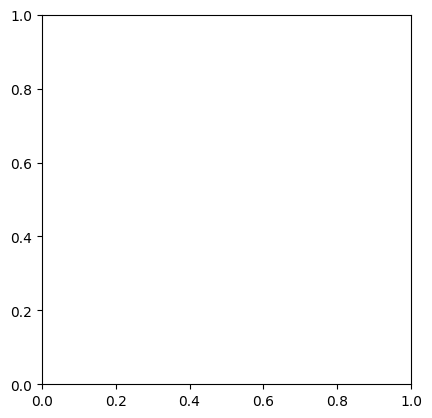

In [12]:
for i in range(20):
    plt.imshow(x_train[i], cmap='gray')
    plt.show()